# **Import Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# **Load Data**

In [ ]:
df = pd.read_csv('/content/dataset_sms_spam_v1.csv')
df.head()

,Teks,label
0,[PROMO] Beli paket Flash mulai 1GB di MY TELKO...,2
1,2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...,2
2,"2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...",2
3,"2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...",2
4,4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Teks    1143 non-null   object
 1   label   1143 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


# **Exploratory Data Analysis**

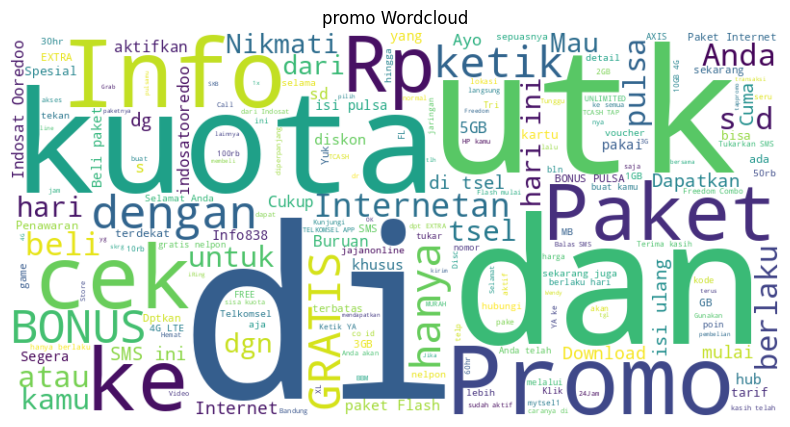

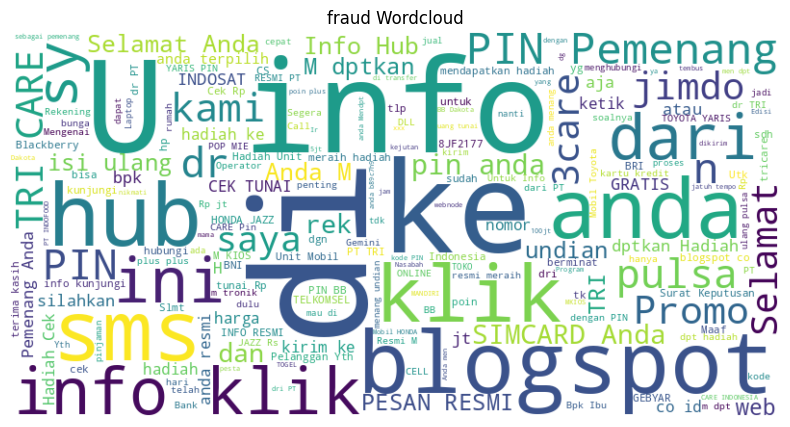

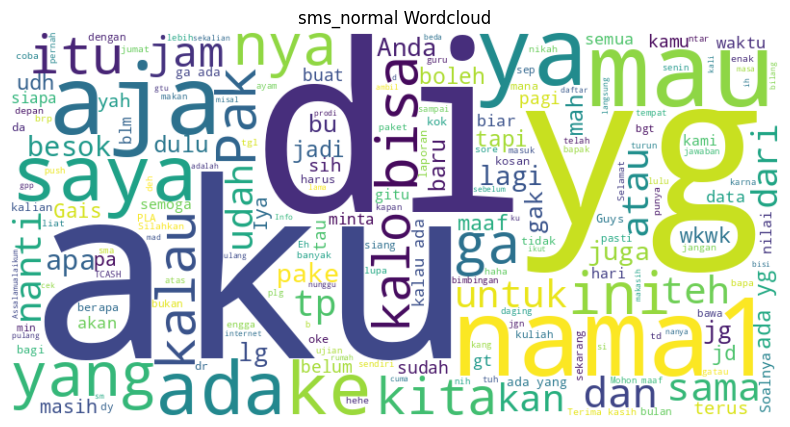

In [ ]:
promo_words = ' '.join(df[df['label'] == 2]['Teks'])
promo_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(promo_words)

plt.figure(figsize=(10, 5))
plt.imshow(promo_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('promo Wordcloud')
plt.show()

fraud_words = ' '.join(df[df['label'] == 1]['Teks'])
fraud_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fraud_words)

plt.figure(figsize=(10, 5))
plt.imshow(fraud_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('fraud Wordcloud')
plt.show()

sms_normal_words = ' '.join(df[df['label'] == 0]['Teks'])
sms_normal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sms_normal_words)

plt.figure(figsize=(10, 5))
plt.imshow(sms_normal_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('sms_normal Wordcloud')
plt.show()

# **Data Preprocessing**

In [ ]:
wordnet=WordNetLemmatizer()
corpus=[]

abbreviations = { "tdk": "tidak", "dr": "dari", "bgmn": "bagaimana", "yg":"yang",
                 "ga":"tidak","dgn":"dengan","lg":"lagi","dpt":"dapat","dg":"dengan",
                  "telp":"telepon","udh":"sudah","dy":"dia","kalo":"kalau","blm":"belum",
                  "tgl":"tanggal","jt":"juta","org":"orang","gais":"guys","tau":"tahu",
                  "abis":"habis","plg":"pulang","hrg":"harga",
                  }
custom_stopwords = set(stopwords.words('indonesian')).union({"itu", "yang","teh","tapi","bu","wkwk","terus"
                                                            ,"sudah","mah","ke","telah","dari","dengan","ntar",
                                                             "ya","aja","gitu","hehe","brp","yah","gak",
                                                             "iya","eh","pake","tuh","tp","jg","mo","sm","karna",
                                                             "ih","sampe","jd","jgn","nya","ap","bgt","gt","pakai",
                                                             "sih","td","dah","haha","gais","guy","mh","dwm","yaa","ko","dri",
                                                             "skrg","utk","yuk","oke","sy","udah"
                                                             })

for i in range(0,len(df)):
    texts = re.sub(r'https?://\S+|www.\S+', '', df["Teks"][i])
    texts = re.sub(r'<.*?>', '', texts)
    texts = re.sub(r'[^a-zA-Z]+', ' ', texts)
    texts = re.sub(r'[0-9]', '', texts)
    texts=texts.lower()
    texts=texts.split()
    texts = [abbreviations[word] if word in abbreviations else word for word in texts]
    texts = [str(wordnet.lemmatize(word)) for word in texts if word not in custom_stopwords]
    texts = [word for word in texts if len(word) > 1]
    texts = [word for word in texts if word not in custom_stopwords]
    texts=' '.join(texts)
    corpus.append(texts)

In [ ]:
df_cleaned=pd.DataFrame({'teks':corpus,'label':df['label']})
df_cleaned.head()

,teks,label
0,promo beli paket flash gb my telkomsel app ext...,2
1,gb rp ribu spesial terpilih aktifkan promo sd ...,2
2,pulang yth sisa kuota flash kb download mytelk...,2
3,pulang yth sisa kuota flash kb download mytelk...,2
4,gb rp ribu spesial terpilih aktifkan buruan skb,2


In [ ]:
df['label'].unique()

array([2, 1, 0])

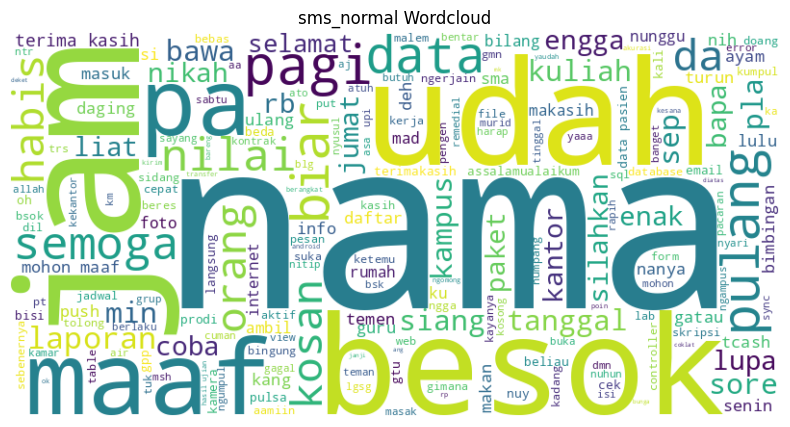

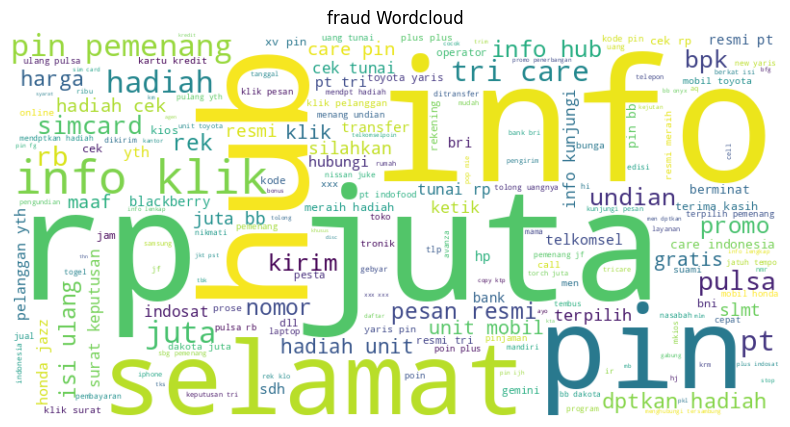

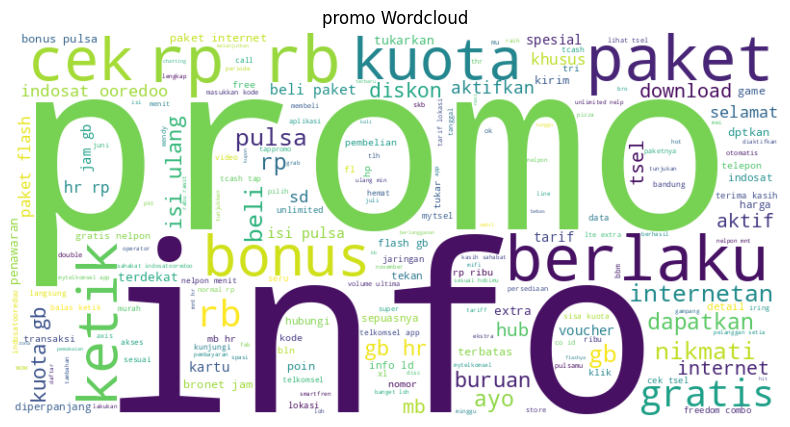

In [ ]:
sms_normal_words = ' '.join(df_cleaned[df_cleaned['label'] == 0]['teks'])
sms_normal_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sms_normal_words)

plt.figure(figsize=(10, 5))
plt.imshow(sms_normal_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('sms_normal Wordcloud')
plt.show()

fraud_words = ' '.join(df_cleaned[df_cleaned['label'] == 1]['teks'])
fraud_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fraud_words)

plt.figure(figsize=(10, 5))
plt.imshow(fraud_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('fraud Wordcloud')
plt.show()

promo_words = ' '.join(df_cleaned[df_cleaned['label'] == 2]['teks'])
promo_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(promo_words)

plt.figure(figsize=(10, 5))
plt.imshow(promo_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('promo Wordcloud')
plt.show()

# **Modelling with Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df_cleaned['teks'], df_cleaned['label'], test_size=0.2, random_state=42)

cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_cv, y_train)

y_pred = nb_classifier.predict(X_test_cv)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9126637554585153
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        99
           1       0.94      0.94      0.94        82
           2       0.78      0.96      0.86        48

    accuracy                           0.91       229
   macro avg       0.90      0.92      0.91       229
weighted avg       0.92      0.91      0.91       229



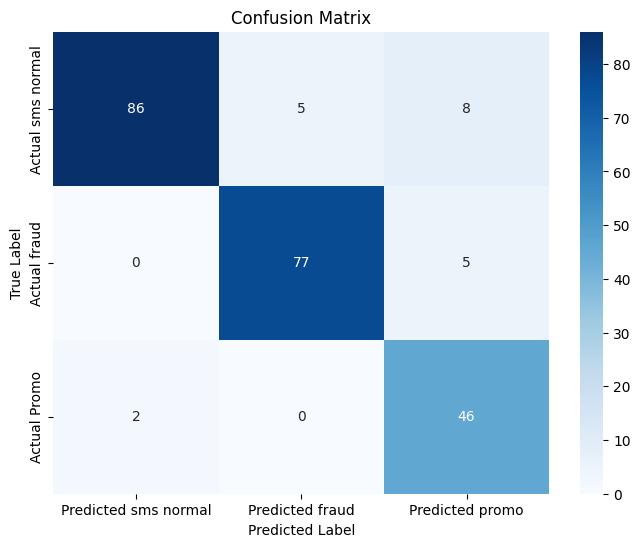

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted sms normal', 'Predicted fraud', 'Predicted promo'],
            yticklabels=['Actual sms normal', 'Actual fraud', 'Actual Promo'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()